In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import camb
from camb import model, initialpower
from camb.sources import GaussianSourceWindow, SplinedSourceWindow
import numpy as np
import sympy as sy
from sympy import symbols
from scipy import interpolate
from scipy import optimize
import matplotlib
from matplotlib import pyplot as plt

In [2]:
##PARAMETRI INIZIALI

pars = camb.CAMBparams()  #0.022 0.122 67.5
pars.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933)   #H0= hubble parameter today in km/s    ombh2=physical density in baryons omch2=physical density in cold dark matter
#trovo densità diverse...
pars.InitPower.set_params(ns=0.9665)  #ns = scalar spectra index (inflaction)


class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.9665
 nrun = 0.0
 nrunrun = 0.0
 nt = -0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2e-09
 At = 1.0
 

Articolo - Dato originale

H0= 67.66    73

Omega_k = 0.0  

ns= 0.9665    0.965

Omega_c = 0.11933  0.111

Omega_b = 0.02242  0.023

In [3]:
Z = np.arange(0,6.5,0.1)

In [4]:
pars.set_matter_power(redshifts=Z, kmax=3.0)  
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)   

Note: redshifts have been re-sorted (earliest first)


In [5]:
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-2, maxkh=1e-1, npoints = 100) #nota, le z vengono ordinate, ricavo spettro di potenza
#nota, non vengono rordinate le z ma solo i rsultati?

In [6]:
H0 = results.hubble_parameter(0)    #parametri di hubble
h = H0/100
def H(z):
    return results.hubble_parameter(z)

kh = kh/h  #H0 = 70km/(s*Mpc) h=0.7 ma non era senza unità di misura?
pk = pk*h**3

In [7]:


f = (results.get_fsigma8()/results.get_sigma8())
dl = results.luminosity_distance(z)

d = np.zeros(len(z))
for i,zt in enumerate(z):
    d[i] = results.comoving_radial_distance(zt)   #trova la distanza comovente perché non lo fa con l'array
 #la calcola alla z scelta già, UNITà DI MISURA

z = np.array(z)
f = np.flipud(f)  #inverte l'array perché l'ha messo nell'ordine sbagliato

In [8]:
fl= (2*dl/(1+z))/(d+(1+z)*2.99e5/H(z))
type(f)

numpy.ndarray

In [9]:
f1 =  interpolate.interp1d(z,fl,kind='cubic')
f2 =  interpolate.interp1d(z,f,kind='cubic')


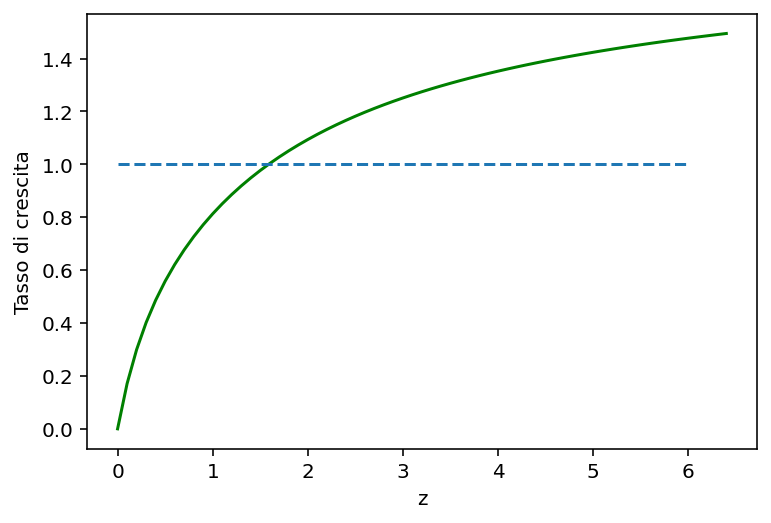

In [14]:
fit, ax = plt.subplots()
#ax.plot(z,f1(z),'g', z,f2(z),'b')
ax.plot(z,f1(z),'g')
ax.set_xlabel('z')
ax.set_ylabel('Tasso di crescita')
#ax.legend(['fl','f'])

xpoints= np.arange(0,7,1)
ypoints = np.ones(len(xpoints))
plt.plot(xpoints,ypoints, '--')


#plt.axis([0.5,1.4,0,1.5])

In [11]:
y2= lambda x: f1(x) - f2(x)
error1 = optimize.brentq(y2,1,2) 
error1

1.278522449379787

In [12]:
x = np.arange(1.58,1.7,0.01)    #interseca l'uno nell'intervallo 
for i in x:
    print(f1(i))

0.9981886881792167
1.0007682158708027
1.0033312409576725
1.0058779346510416
1.008408452563582
1.0109229464083294
1.0134215678983203
1.015904468746591
1.0183718006661773
1.0208237153701154
1.0232603645714415
1.0256818999831918


In [13]:
f1(1)

array(0.81303544)